<a href="https://colab.research.google.com/github/CodeWithAlvin/face_emotion_detector_live/blob/main/emotion_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [90]:
import pickle

In [91]:
with open("/content/drive/MyDrive/Others/emo_pix.pkl",'rb') as f:
  X=pickle.load(f)
with open("/content/drive/MyDrive/Others/emo_val.pkl",'rb') as f1:
  y=pickle.load(f1)

In [92]:
def split_data(X,y):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [93]:
split_data(X,y)

# visualizing data

In [94]:
emotion_dict = {0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Sad", 5: "Surprise", 6: "Neutral"}

In [95]:
def show_feature(i):
  image=X_train[i].reshape(48,48)
  imgplot = plt.imshow(image)
  plt.show()
  print(emotion_dict[y_train[i]])

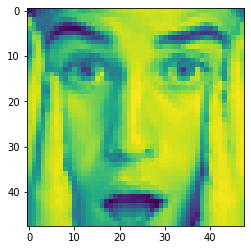

Surprise


In [96]:
show_feature(23)

In [97]:
def show_histo(array):
  pd.DataFrame(array).hist(bins=20, figsize=(15,15), color='b')
  plt.show()

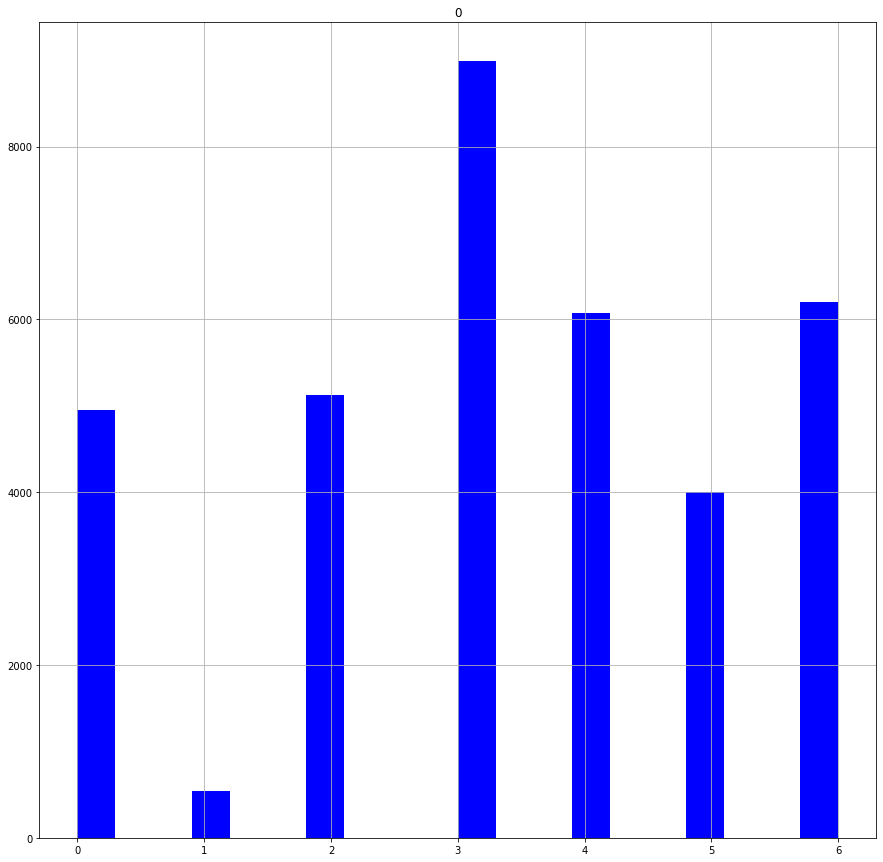

In [98]:
show_histo(y)

In [99]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [100]:
def create_model(X_train,y_train,*args,**kwargs):
  model=make_pipeline(*args,**kwargs)
  model.fit(X_train,y_train)

In [101]:
create_model(X_train,y_train,StandardScaler(),RandomForestClassifier(max_depth=100, random_state=0))

In [102]:
with open("/content/drive/MyDrive/Others/model.pkl","wb") as f:
  pickle.dump(model,f)

In [103]:
#Checking accuracy

In [104]:
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
import math

In [105]:
#final testing

In [108]:
def analyze_model(model,X_test):
  y_pred=model.predict(X_test)
  f1=f1_score(y_test, y_pred,average='micro')
  mse=mean_squared_error(y_test,y_pred)
  print(f"f1-score : {f1} rmse : {math.sqrt(mse)}")

In [109]:
analyze_model(model,X_test)

f1-score : 0.4605739760378936 rmse : 2.0421171385000934
